# Community Detection
Im Skript haben Sie Verfahren zur Community Detection kennengelernt. Diese sollen Sie nun praktisch anwenden. Als Datenbasis dient erneut das bereits bekannte Terroristen-Netzwerk. Bevor Sie mit der Analyse starten, müssen erneut die notwendigen Pakete importiert werden.

Vor Ausführung der folgenden Zelle müssen Sie die Datei plot_dendrogram.py, die Sie in Moodle finden, in Ihrem Arbeitsverzeichnis (gleicher Ort wie ihre Jupyter Notebooks) ablegen. Ansonsten läuft der Import auf Fehler.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import networkx as nx
import networkx.algorithms.community as nx_comm
import pandas as pd
import plot_dendrogram as pltdend
from pyvis import network as net
from random import randint

Dieses Mal laden Sie das 911-Netzwerk im .graphml-Format, mit dem gesamte Netzwerke inkl. Node und Edge Attribute geschrieben und gelesen werden können.

In [2]:
# Load network from graphml format
G_911 = nx.read_graphml('./datasets/911.graphml')

Alle Knoten des Netzwerks enthalten das Node Attribut "ties", welches die Gruppenzugehörigkeit jedes Terroristen angibt. Analog dem vorherigen Notebook visualisieren wir das Netzwerk inkl. Gruppenzugehörigkeit.

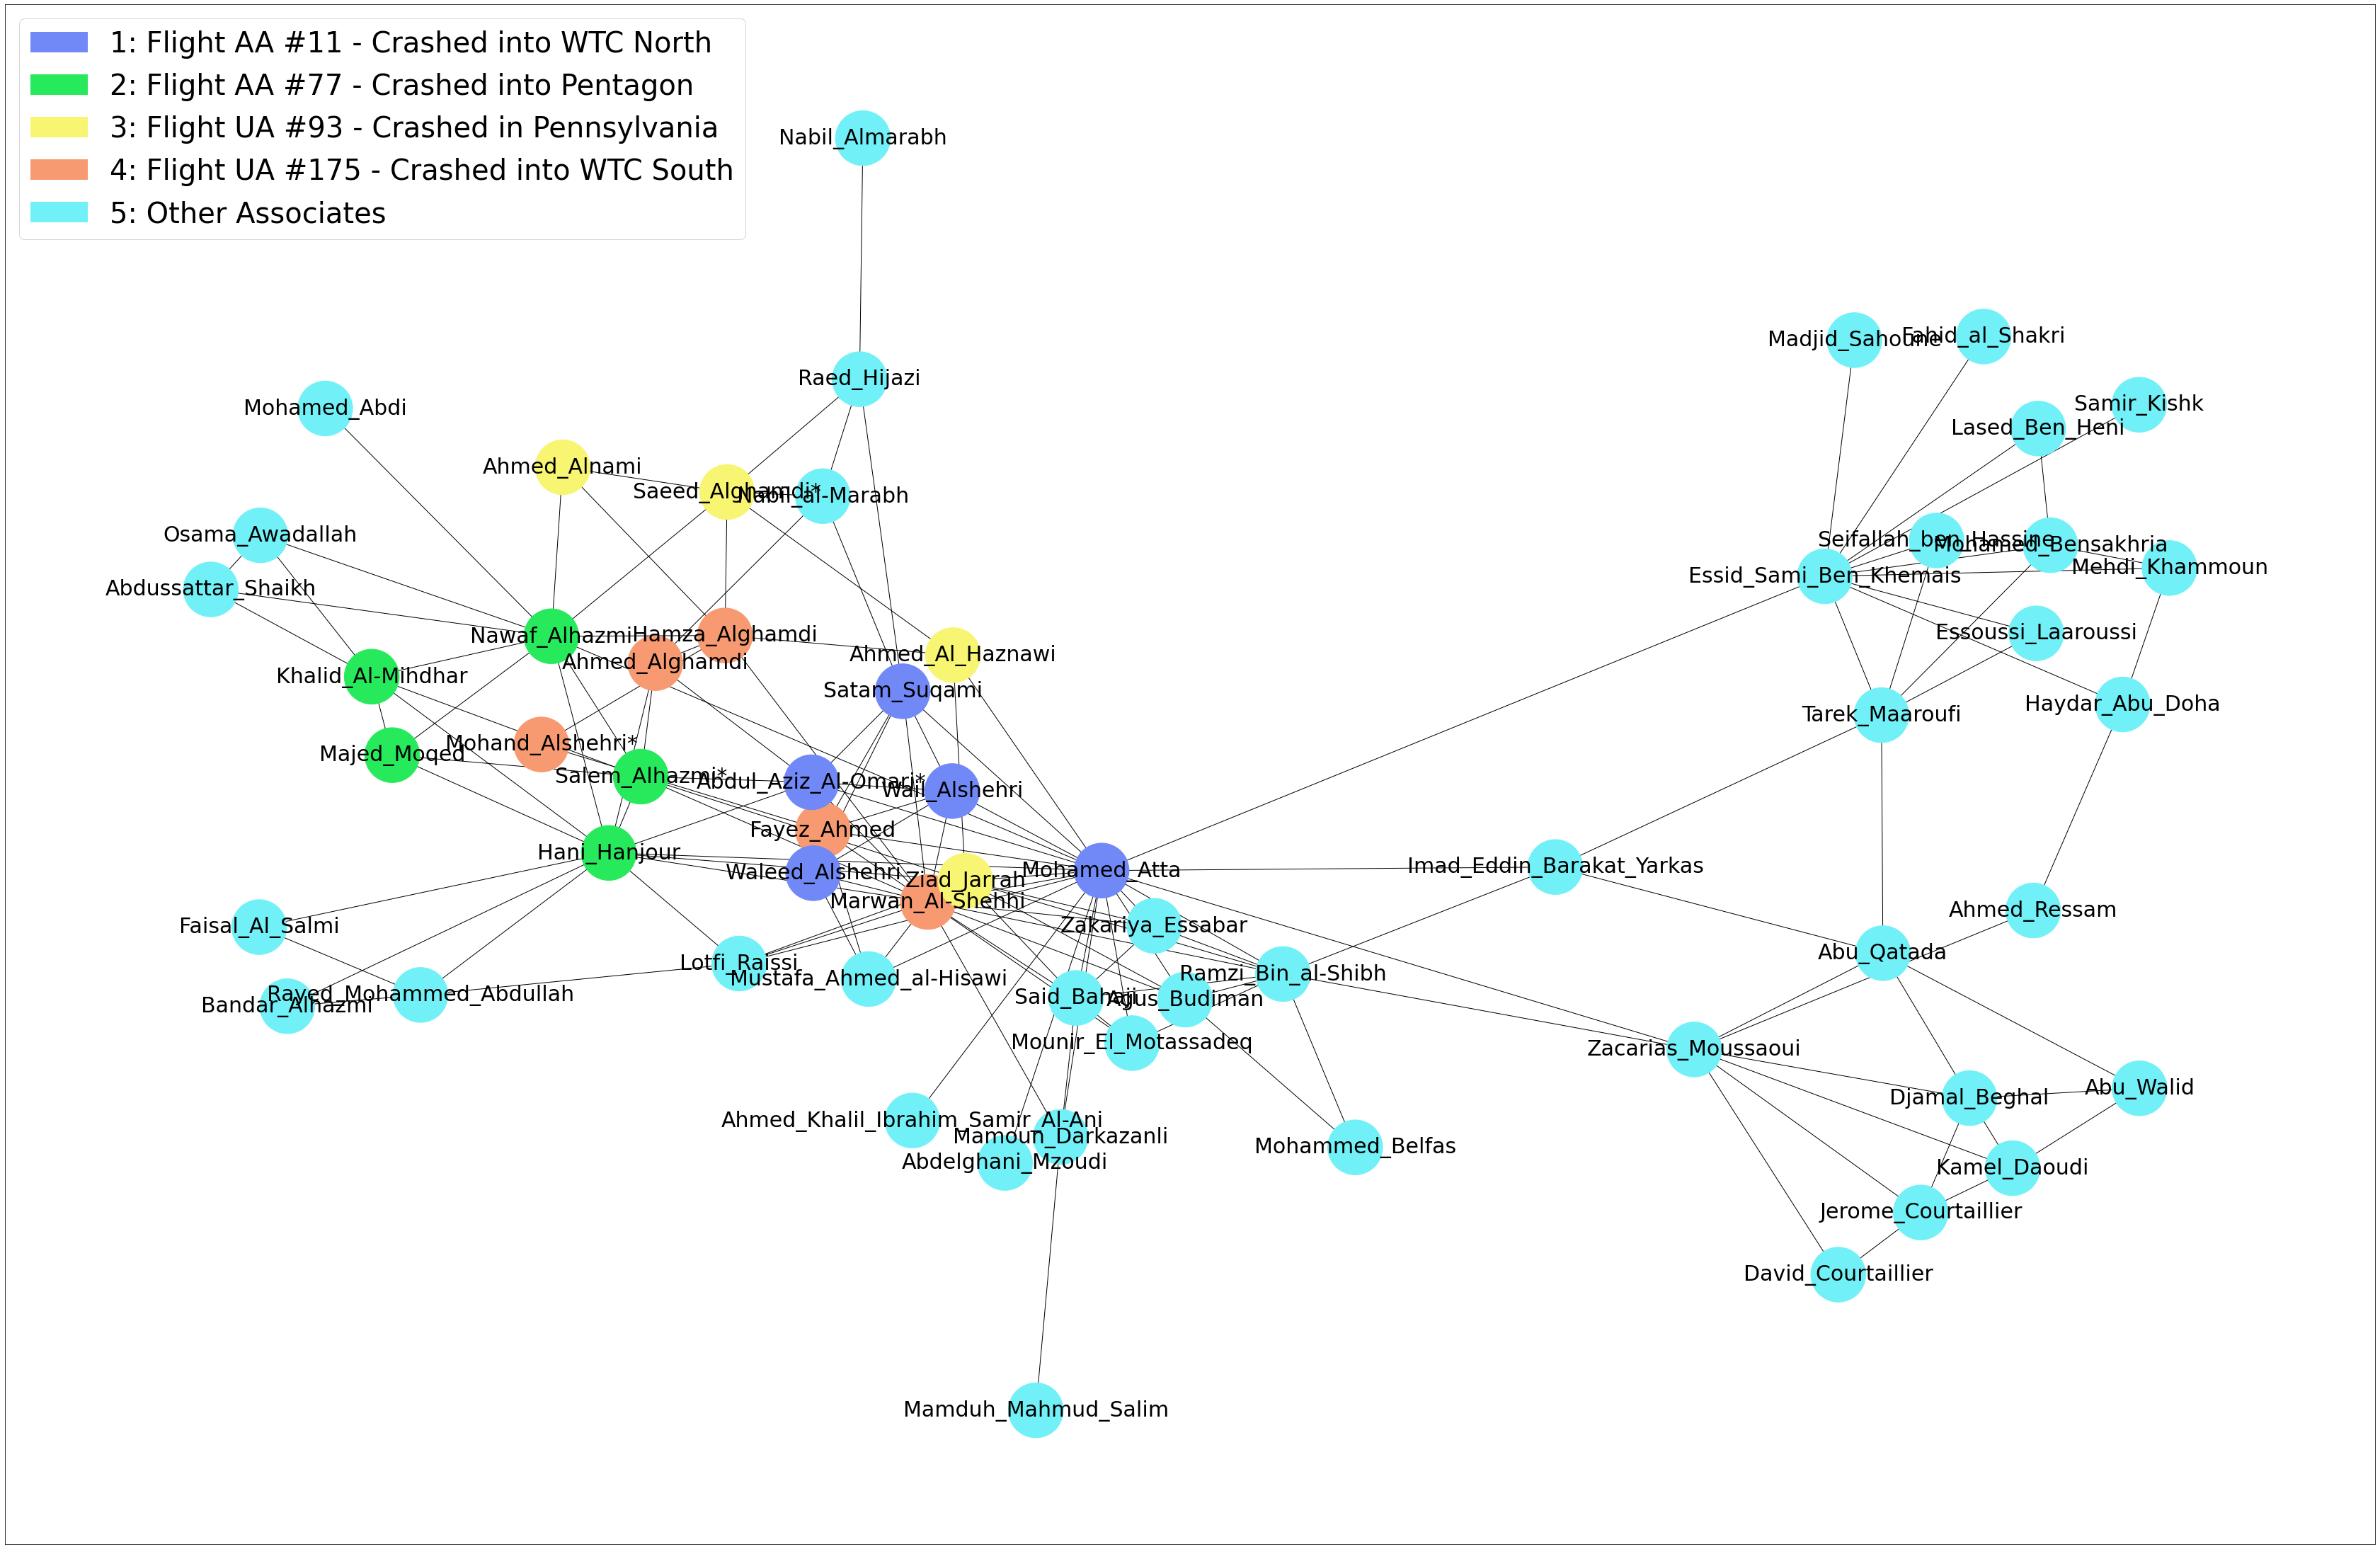

In [3]:
# create color map for nodes and ties
colors = []

for node in G_911:
    if G_911.nodes[node]['ties'] == 1:
        colors.append('#7189F7')
    elif G_911.nodes[node]['ties'] == 2:
        colors.append('#26EA5B')
    elif G_911.nodes[node]['ties'] == 3:
        colors.append('#F7F571')
    elif G_911.nodes[node]['ties'] == 4:
        colors.append('#F79A71')
    else: 
        colors.append('#71F1F7')
        
# draw the network G_911 with labels, bigger size and colors representing the ties
plt.figure(figsize=(60, 40))
nx.draw_networkx(G_911, with_labels=True, node_size=6000, node_color=colors, font_size=30)

# create data structures for legend
colors_distinct = ['#7189F7','#26EA5B','#F7F571','#F79A71','#71F1F7']
labels = ['1: Flight AA #11 - Crashed into WTC North','2: Flight AA #77 - Crashed into Pentagon',
          '3: Flight UA #93 - Crashed in Pennsylvania','4: Flight UA #175 - Crashed into WTC South',
          '5: Other Associates']
handles=[]

# manually define legend patches and append them to the handles list using list comprehension
[handles.append(mpatches.Patch(color=c, label=l)) for (c,l) in zip(colors_distinct, labels)]

# plot the legend
plt.legend(handles=handles, loc='upper left', prop={'size': 40})
plt.show()

## Label-Propagation-Algorithmus
### Aufgabe 1
Ermitteln Sie die Communities des Netzwerks mithilfe des **asynchronen** Label-Propagation-Algorithmus. Verwenden Sie dazu *nx_comm.asyn_lpa_communities()*. Konvertieren Sie die erhaltenen Communities in eine Liste und speichern Sie diese in der Variable lpa_asyn_comm.

In [ ]:
# Platz für Ihre Lösung

### Aufgabe 2
Legen Sie für jeden Knoten des Netzwerks ein Node-Attribut *lpa_asyn_comm* an und speichern in diesem die zugeordnete Community. 

**Tipp:** Sie können z.B. mit zwei verschachtelten for-Schleifen über alle Communities in der Liste und innerhalb jeder Community über deren Knoten loopen und den Attribut-Wert jedes Knotens auf den Index der zugeordneten Community in der Liste setzen.

In [ ]:
# Platz für Ihre Lösung

### Aufgabe 3
Wie viele verschiedene Communities haben Sie in Aufgabe 1 mithilfe des asynchronen LPA ermittelt?

**Tipp:** Verwenden Sie len().

In [ ]:
# Platz für Ihre Lösung

Führen Sie die folgende Zelle aus, die eine generische Funktion zur Visualisierung von Communities auf Basis von Node Attributen implementiert. Diese benötigen Sie für die folgende Aufgabe.

In [ ]:
def plot_communities (node_attr_comm, graph):
    
    colors = [graph.nodes[node][node_attr_comm] for node in graph.nodes()]

    plt.figure(figsize=(60, 40))
    nx.draw_networkx(graph, with_labels=True, node_size=6000, cmap = plt.get_cmap('jet'), node_color=colors, font_size=30)

### Aufgabe 4
Visualisieren Sie die ermittelten Communities, indem Sie der Funktion *plot_communities* den Namen des Node Attributs übergeben, das die Community-Zuordnung enthält, die Sie visualisieren wollen. Außerdem müssen Sie der Funktion den Graphen mitgeben.

In [ ]:
# Platz für Ihre Lösung

## Girvan-Newman-Algorithmus
### Aufgabe 6
Ermitteln Sie die Communities des Netzwerks mithilfe des Girvan-Newman-Algorithmus. Speichern Sie diese als Liste in der Variable girvan_comm.

In [ ]:
# Platz für Ihre Lösung

### Aufgabe 7
Plotten Sie das Dendrogramm der Community-Aufteilung mithilfe von *pltdend.plot_dendrogram(girvan_comm)*. Wie interpretieren Sie das Dendrogramm?

In [ ]:
# Platz für Ihre Lösung

**Interpretation des Dendrogramms:**
Platz für Ihre Lösung

### Aufgabe 8
Die Variable girvan_comm ist eine Liste, die zu jeder Iteration des Girvan-Newman-Algorithmus (entspricht der Entfernung einer Kante) ein Tupel mit den aktuellen Community-Zuordnungen enthält. Berechnen Sie für jede dieser Iterationen die Modularität. Selektieren Sie anschließend die Iteration mit der maximalen Modularität, um die optimale Community-Aufteilung zu identifieren.

**Tipp:** Loopen Sie über alle Iterationen, berechnen Sie jeweils die Modularität mit nx_comm.modularity(G_911, iteration) und schreiben Sie die Modularitätswerte in eine Liste. Ermitteln Sie anschließend mit max(liste) die höchste Modularität und die zugehörige Iteration mit index(max(list)).

In [ ]:
# Platz für Ihre Lösung

### Aufgabe 9
Wandeln Sie die Community-Zuordnung der in Aufgabe 8 ermittelten Iteration (höchste Modularität) mit list(girvan_comm[iteration]) in eine Liste um. Legen Sie anschließend für jeden Knoten des Netzwerks ein Node-Attribut *girvan_comm* an und speichern in diesem die zugeordnete Community anhand der zuvor erstellten Liste. 

**Tipp:** Den Code für die Anlage der Node Attributes können Sie aus Aufgabe 2 und übernehmen die Variablen anpassen.

In [ ]:
# Platz für Ihre Lösung

### Aufgabe 10
Visualisieren Sie die ermittelten Communities, indem Sie der Funktion *plot_communities* den Namen des Node Attributs *'girvan_comm'* sowie den Graphen übergeben.

In [ ]:
# Platz für Ihre Lösung

## Analyse des Game of Thrones Netzwerks
Als nächstes wollen wir ein Netzwerk betrachten, dessen Knoten Figuren aus *Game of Thrones* darstellen und Kanten Verbindungen zwischen diesen Figuren. Das Netzwerk wurde aus dem ersten Game of Thrones Buch extrahiert. Eine Verbindung zwischen zwei Figuren wurde angelegt, wenn deren Namen in einem Abstand von 15 Wörtern zueinander auftreten. Die Kantengewichte geben an, wie oft Figuren gemeinsam auftreten.
Das Netzwerk liegt erneut im .graphml-Format vor und muss im ersten Schritt geladen werden

In [ ]:
# Load network from graphml format
G_got = nx.read_graphml('./datasets/got.graphml')

### Aufgabe 11
Prüfen Sie, wie viele Knoten und Kanten das Netzwerk enthält.

In [ ]:
# Platz für Ihre Lösung

Wie Sie sehen, ist das Netzwerk schon etwas größer als das Terroristen-Netzwerk. Eine statische Visualisierung dieses Netzwerks kann bereits unübersichtlich werden. Deshalb lernen Sie an dieser Stelle eine Form der interaktiven Visualierung von Netzwerken mithilfe des *pyvis*-Package kennen. *Pyvis* besitzt eine Integration mit NetworkX, sodass in NetworkX vorliegende Graphen einfach visualisiert werden können.

Führen Sie die folgende Zelle aus, um das Game of Thrones Netzwerk mit *Pyvis* zu visualisieren. In der resultierenden Darstellung können Sie zoomen, Knoten verschieben und sich durch Klick auf einen Knoten dessen Nachbarn anzeigen lassen.

In [ ]:
# set node colors
for n in G_got.nodes:
  G_got.nodes[n]['color'] = '#1D9EA2'

# set edge colors
for e in G_got.edges:
  G_got.edges[e]['color'] = '#1D9EA2'

# draw interactive network
got = net.Network(notebook=True, height='750px', width='100%', bgcolor='#222222', font_color='white')
got.from_nx(G_got)

neighbor_map = got.get_adj_list()

# add neighbor data to node hover data
for node in got.nodes:
    node['title'] += ' Neighbors:<br>' + '<br>'.join(neighbor_map[node['id']])
    node['value'] = len(neighbor_map[node['id']])

got.show('got.html')

### Aufgabe 12
Ermitteln Sie die Communities des Netzwerks mithilfe des asynchronen Label-Propagation-Algorithmus. Konvertieren Sie das Ergebnis in eine Liste und speichern es in der Variable *got_comm*.

In [ ]:
# Platz für Ihre Lösung

Führen Sie nun die beiden folgenden Zellen aus, um das Netzwerk erneut mit farblicher Zuordnung der Knoten zur entsprechenden Community zu visualisieren.

In [ ]:
# set node color according to community assignment

for c in got_comm:
    
    # create random hex-color per community
    color = '#%06X' % randint(0, 0xFFFFFF)
    
    # set color per node
    for n in c:
        G_got.nodes[n]['color'] = color

In [ ]:
# draw interactive network
got = net.Network(notebook=True, height='750px', width='100%', bgcolor='#222222', font_color='white')
got.from_nx(G_got)

neighbor_map = got.get_adj_list()

# add neighbor data to node hover data
for node in got.nodes:
    node['title'] += ' Neighbors:<br>' + '<br>'.join(neighbor_map[node['id']])
    node['value'] = len(neighbor_map[node['id']])

got.show('got.html')

### Aufgabe 13 (optional)
Falls Sie Game of Thrones gelesen oder gesehen haben: Können Sie die Ergebnisse des LPA-Algorithmus nachvollziehen, d.h. decken sich die Ergebnisse mit Ihren Kenntnissen über Personengruppen in Game of Thrones?

**Antwort:** Hier ist Platz für Ihre Lösung.